**Vinay Nagaraj - Week 9 & 10 Assignment**

In [1]:
# Import necessary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import os
import twitter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Activity 9: Extracting the Top 100 eBooks from Gutenberg**

In [2]:
# Check SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Read HTML from URL
gutenberg_url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(gutenberg_url)

In [4]:
# Write small function to check the status of request

def status_check(r):
    if r.status_code==200:
        print("Successful Request..!")
        return 1
    else:
        print("Failed Response..!")
        return -1

In [5]:
status_check(response)

Successful Request..!


1

In [6]:
# Decode the response and pass this on to BeautifulSoup for HTML parsing

contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>
<m

In [7]:
# Find all href tags and store them in the list of links. Check what the list looks like- print the first 30 elements.

link_list=[]                              # Create empty list
for link in soup.find_all('a'):           # Find all tag 'a'
    link_list.append(link.get('href'))    # Scrape links from 'href' tag and append into the list

In [8]:
# link_list[:30]  is the command to print first 30 elements in list. But I decided to print 40 since I wanted to get the range for my book numbers
link_list[:40]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1254',
 '/ebooks/84',
 '/ebooks/1342',
 '/ebooks/25344',
 '/ebooks/2542',
 '/ebooks/1232',
 '/ebooks/46']

In [9]:
# Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 ebooks
# Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in
# the link href string. Use the findall method.

num=[]
for i in range(33,133):                       # 33 to 133 has book numbers
    link=link_list[i]                         # Evaluate each element
    link=link.strip()                         # Strip link from element
    n=re.findall('[0-9]+', link)              # regular expression to find numeric digits
    if len(n)==1:
        num.append(int(n[0]))                 # Add the number into list

print(num)

[1254, 84, 1342, 25344, 2542, 1232, 46, 1952, 11, 1250, 16328, 1080, 41, 43, 5200, 98, 345, 844, 1661, 2701, 160, 76, 205, 23, 74, 1260, 42108, 1064, 174, 2591, 2852, 120, 219, 215, 1400, 16, 408, 63609, 42324, 1497, 209, 3825, 26839, 902, 158, 38269, 2814, 2500, 6130, 203, 3207, 63605, 55, 5740, 36, 15399, 2554, 768, 63604, 514, 2600, 42884, 113, 58585, 140, 45, 1184, 40074, 1727, 27827, 996, 19942, 4300, 3600, 308, 779, 135, 57775, 1063, 28054, 2148, 34901, 236, 1251, 815, 13701, 22120, 4363, 63603, 7370, 63610, 376, 4934, 11030, 1001, 22381, 4517, 20203, 12, 244]


In [10]:
# Use the .text method and print only the first 2000 characters

content = soup.text
content[:2000]

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not co

In [11]:
# Search in the extracted text(using regex) from soup object to find names of the top 100 eBoooks(yesterday's ranking)

title_temp=[]                            # Temp Empty list for name
strt_index=content.splitlines().index('Top 100 EBooks yesterday')     # Create Starting index

for i in range(100):                     # Loop for 100 times
    line = soup.text.splitlines()[strt_index+10+i]  # Read each line
    title_temp.append(line)                         # Add each line into the list

title_temp[:10]                                     # Print first 10 elements

['Cyrano de Bergerac by Edmond Rostand (3964)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3274)',
 'Pride and Prejudice by Jane Austen (2771)',
 'The Scarlet Letter by Nathaniel Hawthorne (2035)',
 'Et dukkehjem. English by Henrik Ibsen (1495)',
 'Il Principe. English by Niccolò Machiavelli (1418)',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (1417)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (1127)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1097)",
 'Anthem by Ayn Rand (1031)']

In [12]:
# Use regex to to extract only text from the list

title_list=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',title_temp[i]).span()  # Span over lost to extract only characters
    title_list.append(title_temp[i][id1:id2])             # Add them into the list

title_list                                                # Print the list

['Cyrano de Bergerac by Edmond Rostand ',
 'Frankenstein',
 'Pride and Prejudice by Jane Austen ',
 'The Scarlet Letter by Nathaniel Hawthorne ',
 'Et dukkehjem',
 'Il Principe',
 'A Christmas Carol in Prose',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'Alice',
 'Anthem by Ayn Rand ',
 'Beowulf',
 'A Modest Proposal by Jonathan Swift ',
 'The Legend of Sleepy Hollow by Washington Irving ',
 'The Strange Case of Dr',
 'Metamorphosis by Franz Kafka ',
 'A Tale of Two Cities by Charles Dickens ',
 'Dracula by Bram Stoker ',
 'The Importance of Being Earnest',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'Moby Dick',
 'The Awakening',
 'Adventures of Huckleberry Finn by Mark Twain ',
 'Walden',
 'Narrative of the Life of Frederick Douglass',
 'The Adventures of Tom Sawyer by Mark Twain ',
 'Jane Eyre',
 'The Slang Dictionary',
 'The Masque of the Red Death by Edgar Allan Poe ',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'Grimms',
 'The Hound of the Baskerv

**Activity 10: Building your own movie database by reading an API**

In [13]:
# Key is stored in OMDB_APIkey.json file
# Load the secret API key from a JSON file stored in the same folder in a variable by using json.loads
# Open OMDb_APIkey.json file
with open('OMDb_APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBApiKey']

In [14]:
# Assign web address to a variable
movie_url = 'http://www.omdbapi.com/?'

# Create variable APIkey
apikey = '&apikey='+omdbapi

In [15]:
# Write utility function called print_json to print the movie data from a JSON file(which we will get from the portal)

def print_json(json_data):
    mov_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
              'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
              'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in mov_keys:                            # Itterate over list of features
        if k in list(json_data.keys()):           # If movie has that feature, print it
            print(f"{k}: {json_data[k]}")

In [16]:
# Write utility function to download a poster

def get_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    
    # Get the file extension
    file_ext=poster_url.split('.')[-1]
    
    # Read image from web
    poster_data=urllib.request.urlopen(poster_url).read()
    
    # Get the location in computer to store the poster file
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Create new directory if the directory does not exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+file_ext     # Get the file name/location
    f=open(filename, 'wb')                            # Open file in write mode
    f.write(poster_data)                              # Write web data into the file
    f.close()                                         # Close the file

In [17]:
# Write a function to search a movie by its name

def search_movie(title):
    try:
        url = movie_url + urllib.parse.urlencode({'t': str(title)})+apikey   # Build complete URl
        print(url)                                                           # Print URL
        ureq = urllib.request.urlopen(url)                                   # Open URL to read
        url_data = ureq.read()                                               # Read raw data from URL
        json_data = json.loads(url_data)                                     # Load the data into JSON format
        
        # Check the response
        if json_data['Response']=='True':
            print_json(json_data)                                           # Call function to print the data
            
            # Check to download poster
            if json_data['Poster']!='N/A':
                get_poster(json_data)                                       # Call function to download
        else:
            print('Error Occurred: ',json_data['Error'])                    # Error for movie not found
    
    except urllib.error.URLError as e:                                      # Error for bad URL
        print(f"Error: {e.reason}")

In [18]:
# Test searchmovie by entering titanic
search_movie("Titanic")

http://www.omdbapi.com/?t=Titanic&apikey=19453978
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,029,426
imdbID: tt0120338


**Connect to the Twitter API and do a simple data pull**

In [19]:
# Connect to twitter API

twi_api = twitter.Api(consumer_key='gva5T9pqO1C3Ht1eRP3fIibWv', 
                  consumer_secret='3c8DASuP23j7Acf14nQZsUXiNLC7kM4SgjoMRs5b6QfDrPI9FM',
                 access_token_key='1324125090271973377-VEYvHIMwAdLkVh3EDq7KMScXWN875L',
                 access_token_secret='5ZqwniuA8wzhIWGY9FsyTGmWqkxbkS4VGQih1QDwt53sQ')

In [20]:
# Check connection

print(twi_api.VerifyCredentials())

{"created_at": "Wed Nov 04 23:03:29 +0000 2020", "default_profile": true, "default_profile_image": true, "id": 1324125090271973377, "id_str": "1324125090271973377", "name": "Vinay Nagaraj", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "VinayNagaraj19"}


In [21]:
# Search tweets containing 'Bellevue University'

twi_api.GetSearch(term='Bellevue University', since=2020-1-1, count=10)

[Status(ID=1324118728037072900, ScreenName=corporatelearn, Created=Wed Nov 04 22:38:00 +0000 2020, Text="There's a difference between moving learning online and online learning that MOVES. Bellevue University has been le… https://t.co/VRuy917Boc"),
 Status(ID=1324116186427174912, ScreenName=thealexgalgano, Created=Wed Nov 04 22:27:54 +0000 2020, Text='@coachaylward @bubruins @ Bellevue University https://t.co/ye1dv1JDCY'),
 Status(ID=1323792136945442817, ScreenName=macwwd, Created=Wed Nov 04 01:00:14 +0000 2020, Text='RoundTable Monthly Leaders Meetings\nLocation: Multi-Purpose Room located on the lower level of the Administrative S… https://t.co/JxIFZ8ijNw'),
 Status(ID=1323706955089633280, ScreenName=chadhoward1998, Created=Tue Nov 03 19:21:46 +0000 2020, Text='RT @AlyshaMcCaffrey: Please be on the lookout for my dads truck. It was stolen from the Red Lion hotel in Bellevue. It’s a 2003 F-350 Plate…'),
 Status(ID=1323656754337615877, ScreenName=CoachJLovell, Created=Tue Nov 03 16:02:

In [22]:
# Search tweets containing 'Data Science'

twi_api.GetSearch(term='Data Science', since=2020-1-1, count=10)

[Status(ID=1323529518959742978, ScreenName=mattwridley, Created=Tue Nov 03 07:36:41 +0000 2020, Text='On @BBCRadio4, @carlheneghan rightly criticised the shocking failure to update with the latest data. \n\nDowning Stre… https://t.co/fE3eyQzTav'),
 Status(ID=1323843383731912705, ScreenName=brianbeutler, Created=Wed Nov 04 04:23:53 +0000 2020, Text='Remember how data science convinced many key decision makers that campaigning against “the world-historical corrupt… https://t.co/DLPP6C61Us'),
 Status(ID=1323945003606069248, ScreenName=mirandarwolpert, Created=Wed Nov 04 11:07:41 +0000 2020, Text='Today @wellcometrust  launch a call for a delivery partner to run a data challenge focusing on mental health in you… https://t.co/j3Eqe3Y40Q'),
 Status(ID=1324155984642600960, ScreenName=epuujee, Created=Thu Nov 05 01:06:03 +0000 2020, Text='RT @cshlmeetings: The third -- and largest -- meeting of Biological Data Science has officially begun! Virtual welcome to everyone joining…'),
 Status(ID=132

**Using one of the datasets provided, choose 3 of the following visualizations to complete**

In [23]:
# I have choosen to use Fifa 2019 dataset which I got from Kaggle
# Read Fifa 2019 csv file
fifa2019 = pd.read_csv("FIFA_data.csv")

In [24]:
fifa2019.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


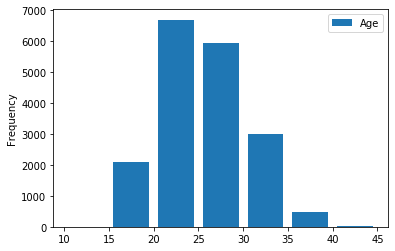

In [25]:
# Plot histogram of Age
fifa2019[['Age']].plot(kind='hist',bins=[10,15,20,25,30,35,40,45],rwidth=0.8)
plt.show()

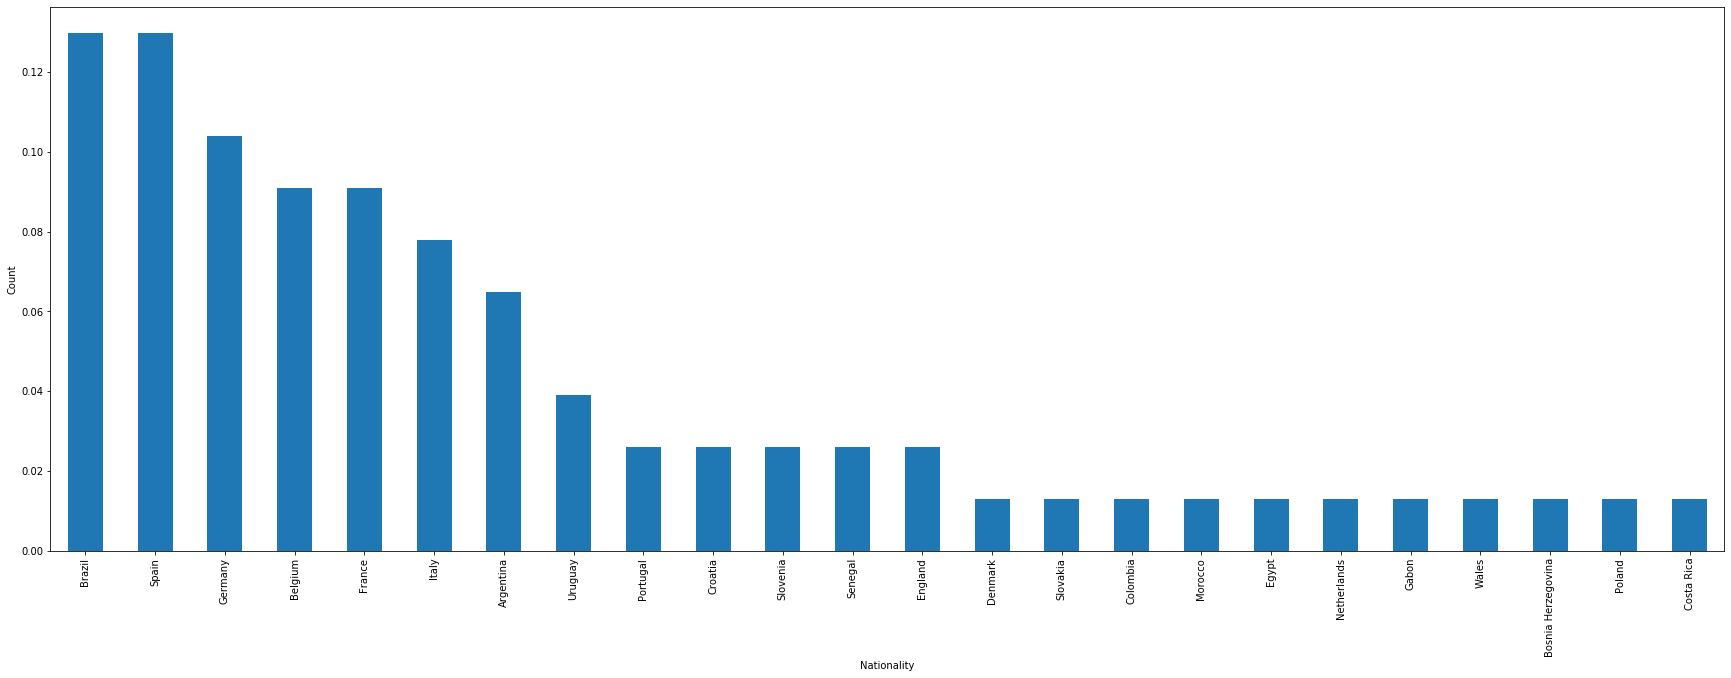

In [26]:
# Bar chart
# Which nationality has the highest number of players who have an overall rating of above 85
fifa2019_df = fifa2019[(fifa2019["Overall"] > 85)]
plt.figure(figsize=(30,10))
fifa2019_df["Nationality"].value_counts(normalize=True).plot.bar()
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.show()

From the above Bar Chart we can notice that Brazil & Spain has the most players with overall rating greater than 85.

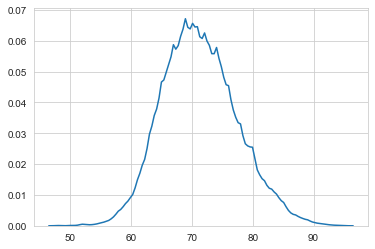

In [27]:
# Density plot
sns.set_style('whitegrid')
sns.kdeplot(np.array(fifa2019["Potential"]), bw=0.5)